# 1.Загрузить файл hr.csv.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import t

In [2]:
df=pd.read_csv('HR.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

In [3]:
df.describe() #среднее,медиана,мин/макс,сред.отклонение)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
df.mode() # мода для всего df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.select_dtypes(include=['object']).mode() 
# мода для признаков

,sales,salary
0,sales,low


In [6]:
df['sales'].value_counts(dropna=False) #кол-во значений по категории sales - департамент работника

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [7]:
df['salary'].value_counts(dropna=False) #кол-во значений по категории

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

# 3.Рассчитать и визуализировать корреляционную матрицу для переменных.

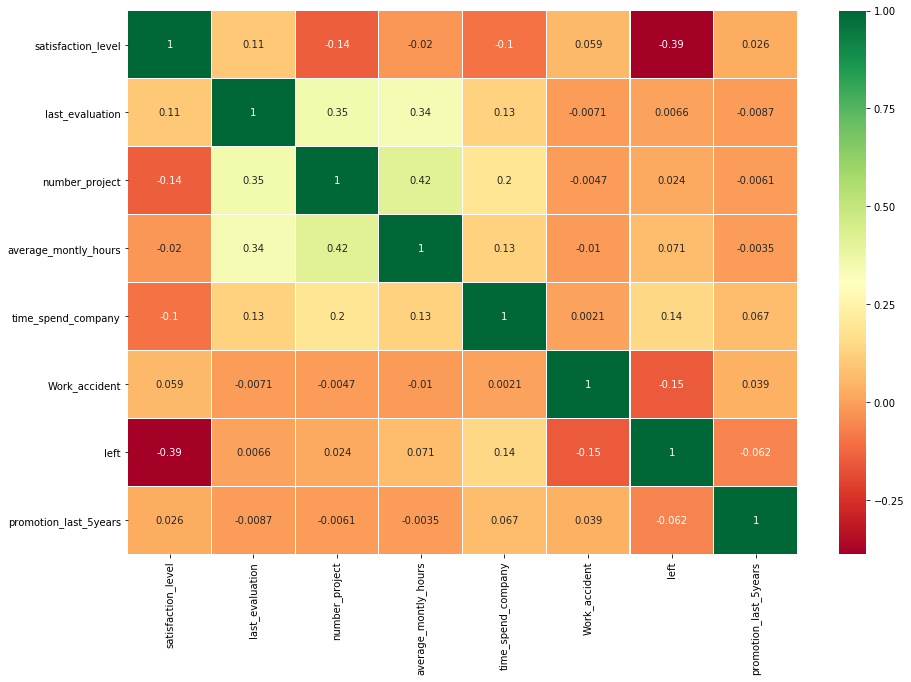

In [8]:

sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.1) #data.corr()-->correlation matrix
fig=plt.gcf()
fig=plt.gcf()
fig.set_size_inches(15,10)
# данные слабо корелируютсяся, прямая корреляция отслеживается между average_montly_hours и number_project, обратная между satisfaction_level и left 

# 4.Визуализировать несколько взаимосвязей между переменными.

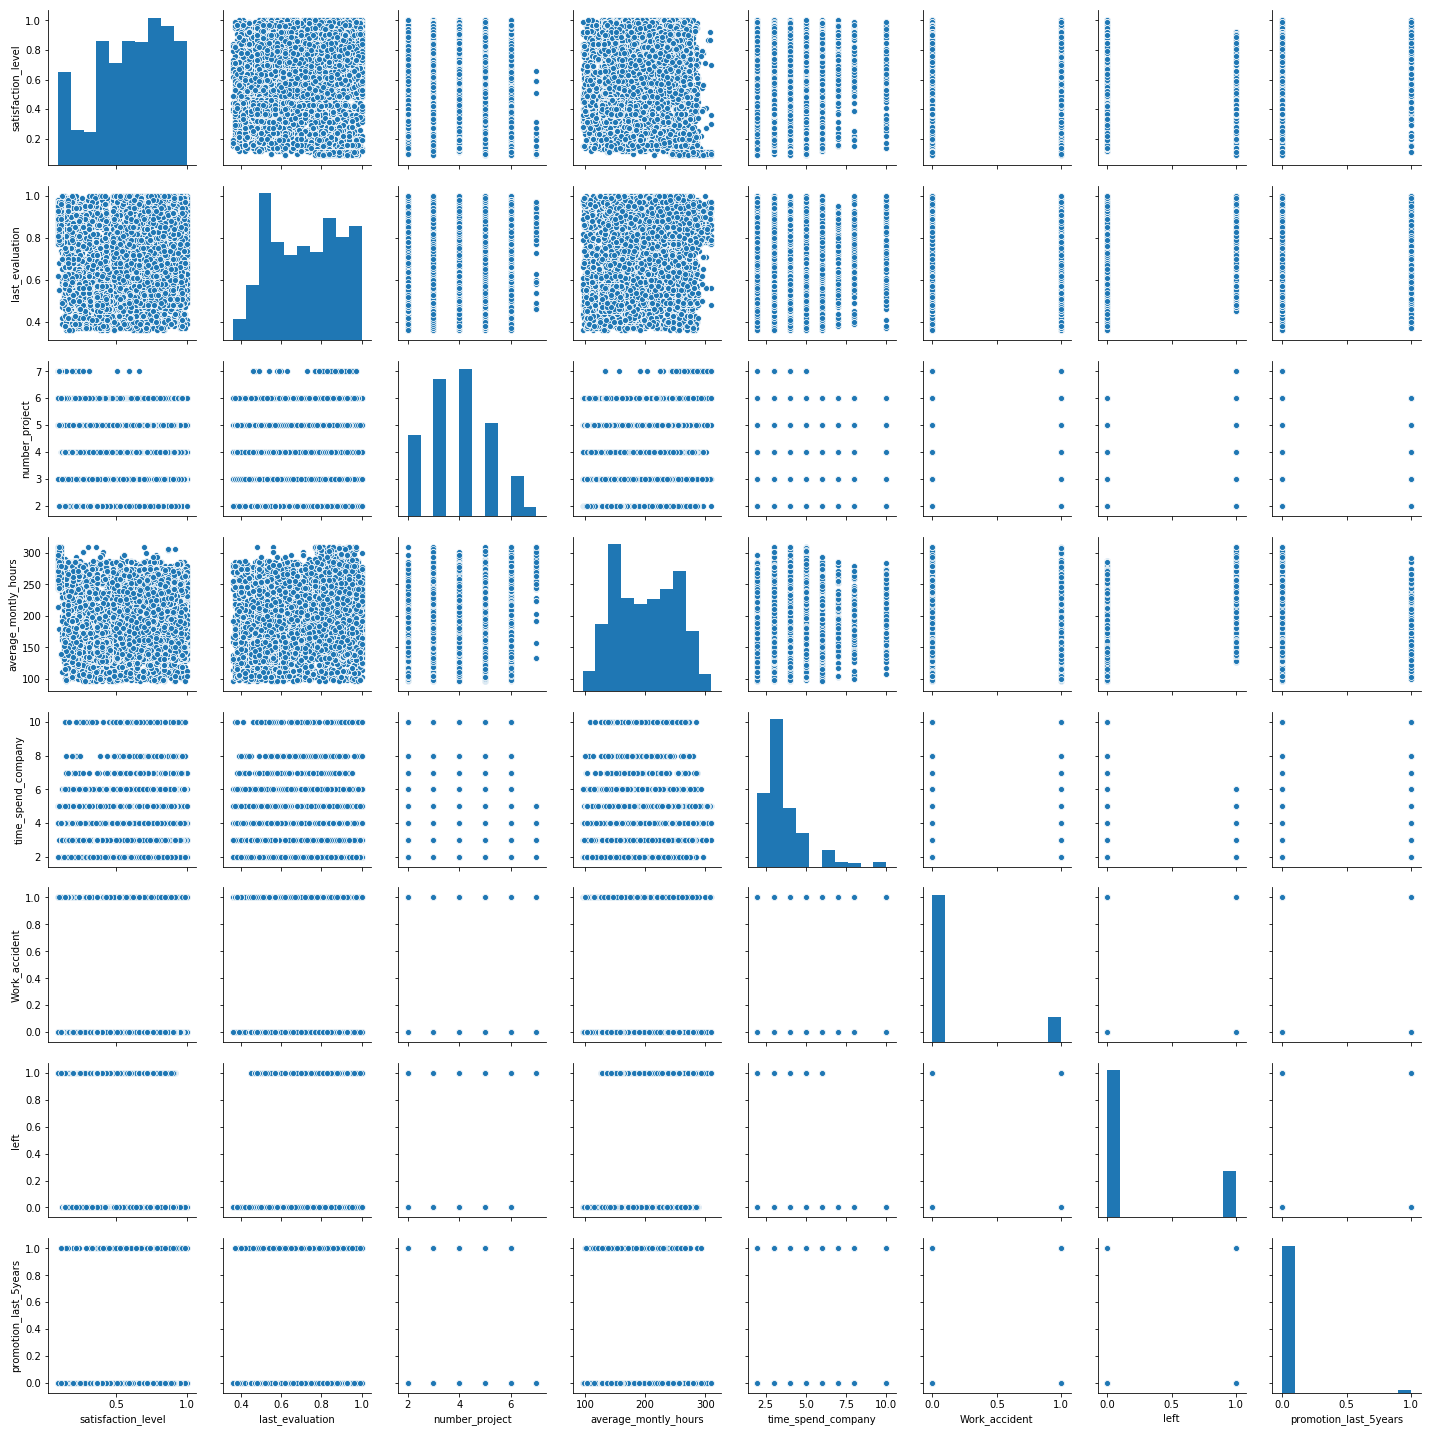

In [55]:
sns.pairplot(df)

### average_montly_hours VS number_project

/home/darya/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


          0    1
0 -0.429907 -1.0
1  0.551402  0.2
2  0.644860  1.0
3  0.186916  0.2
4 -0.411215 -1.0


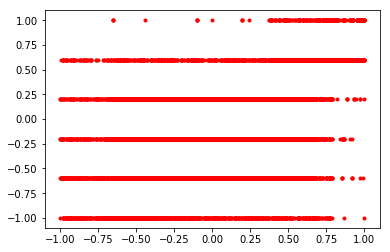

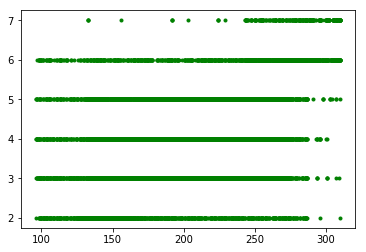

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))

np_scaled = min_max_scaler.fit_transform(df[['average_montly_hours', 'number_project']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])
plt.plot(df_norm[0] , df_norm [1],'r.')
# в данном случае нормализация не интересна и даже мешает сделать корректные выводы по данным
plt.show()
plt.plot(df['average_montly_hours'] , df['number_project'],'g.')

Если проектов становится больше 5, то это увеличивает время работы, 2-5 проектов требует примерно одинаковое время.

### satisfaction_level VS left

In [11]:
df_satis_left = df[df.left.isin([1])].groupby(['satisfaction_level']).left.count().reset_index()
# print(df_satis_left.sort_values(['left'], ascending=False ).head())

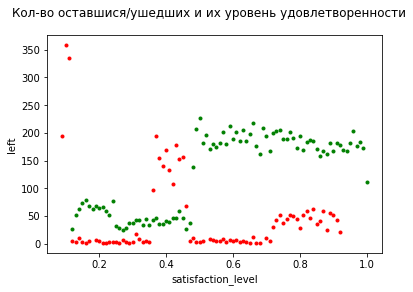

In [12]:
df_satis_noleft = df[df.left.isin([0])].groupby(['satisfaction_level']).left.count().reset_index()
plt.suptitle('Кол-во оставшися/ушедших и их уровень удовлетворенности', fontsize=12)
plt.xlabel('satisfaction_level')
plt.ylabel('left')
plt.plot(df_satis_noleft.satisfaction_level, df_satis_noleft.left, 'g.')
plt.plot(df_satis_left.satisfaction_level, df_satis_left .left, 'r.')

Самое большое кол-во увольнений с уровнем удовлетворенности близком к 0. После 0,5 кол-во сотрудников увеличивается при этом кол-во увольнений не увеличвается. Не понятное увелечиение кол-ва увольенений после 0,7.

# 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.



In [13]:
df_satis_noleft.shape

(89, 2)

In [14]:
df_satis_left.shape

(81, 2)

In [15]:
a = df[df.left.isin([1])].satisfaction_level
# ушедшие сотрудники и их уровень удовлетворенности работой

In [16]:
b = df[df.left.isin([0])].satisfaction_level
# оставшиеся сотрудники и их уровень удовлетворенности работой

In [17]:
stats.ttest_ind(a.sample(n=3500), b.sample(n=3500)) 
'''надо ли ограничивать размер?'''

'надо ли ограничивать размер?'

In [18]:
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Уровень удовлетворенности является значимым для признака покинул сотрудник компанию или нет, т.к. pvalue <0.05

In [19]:
a = df[df.left.isin([1])]['Work_accident']
# ушедшие сотрудники и наличие инцидента на рабочем месте
b = df[df.left.isin([0])]['Work_accident']
# оставшиеся сотрудники и наличие инцидента на рабочем месте
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-19.165804033090176, pvalue=6.613049400453939e-81)

Наличие инцидента на рабочем месте является значимым для признака покинул сотрудник компанию или нет, т.к. pvalue <0.05

In [20]:
a = df[df.left.isin([1])]['last_evaluation']
# ушедшие сотрудники и уровень последней оценки работы
b = df[df.left.isin([0])]['last_evaluation']
# оставшиеся сотрудники и уровень последней оценки работы
stats.ttest_ind(a, b)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

Уровень последней оценки работы сильно не различается для покинувших и оставшихся сотрудников.

# 6.Рассчитать сколько работников работает в каждом департаменте.


In [22]:
df_sales = df['sales'].value_counts(dropna=False).reset_index() 
#кол-во значений по категории sales - департамент работника
df_sales.columns = ['sales', 'count']
df_sales

,sales,count
0,sales,4140
1,technical,2720
2,support,2229
3,IT,1227
4,product_mng,902
5,marketing,858
6,RandD,787
7,accounting,767
8,hr,739
9,management,630


Text(0.5, 1.0, 'Кол-во сотрудников по департаметам')

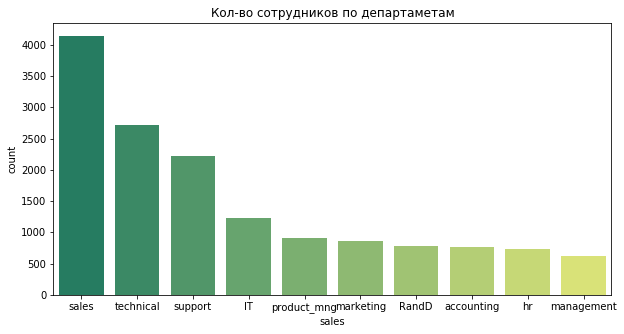

In [23]:
plt.figure(figsize=(10,5))
sns.barplot(x='sales',y='count',data=df_sales,palette='summer')
plt.title('Кол-во сотрудников по департаметам')

# 7.Показать распределение сотрудников по зарплатам.

In [24]:
df_salary = df['salary'].value_counts(dropna=False).reset_index() #кол-во значений по категории salary - уровень зарплаты
df_salary.columns = ['salary', 'count']
df_salary

,salary,count
0,low,7316
1,medium,6446
2,high,1237


Text(0.5, 1.0, 'Кол-во сотрудников по уровню зарплаты')

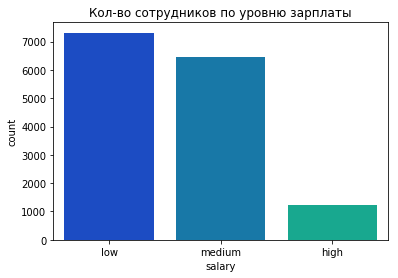

In [25]:
sns.barplot(x='salary',y='count', data=df_salary,palette='winter')
plt.title('Кол-во сотрудников по уровню зарплаты')

# 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

In [26]:
df_s_s = df.groupby(['sales','salary'])['satisfaction_level'].count().reset_index() 
#кол-во значений по категории salary - уровень зарплаты
df_s_s.columns = ['sales', 'salary','count']
df_s_s.head()

,sales,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364


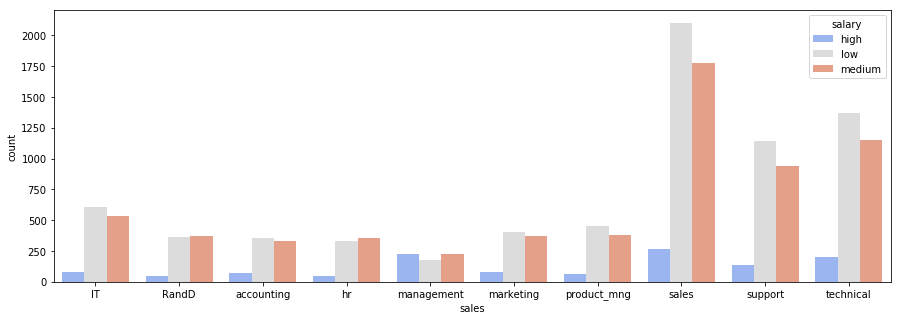

In [27]:
plt.figure(figsize=(15,5))
sns.barplot(x='sales',y='count', hue= 'salary', data=df_s_s, palette='coolwarm')

# 9.Сколько сотрудников покинули компанию.

In [28]:
df[df.left.isin([1])].left.count()

3571

In [52]:
df_left = df.groupby(['left']).left.count()

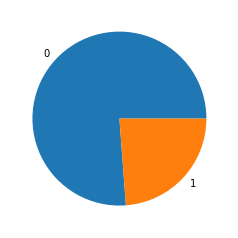

In [53]:
plt.pie(df_left, labels=df_left.index);

# 10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

Маленькая зп?

In [70]:
# Сдалать из признака уровень зп ранг, можно было не делать
def rang (row):
    if row['salary'] =='low':
        return 0
    if row['salary'] =='medium':
         return 1
    return 2

In [71]:
df['salary_rang'] = df.apply (lambda row: rang(row), axis=1)

In [115]:
df.groupby(['left' ,'salary_rang']).agg({'left': 'count'})
df_cross = pd.crosstab(df.salary_rang,df.left)
df_cross['pr'] = df_cross[1]/df_cross[0]
df_cross

left,0,1,pr
salary_rang,,,
0,5144,2172,0.422240
1,5129,1317,0.256775
2,1155,82,0.070996


In [113]:
# t - test
a = df[df.left.isin([1])]['salary_rang']
# ушедшие сотрудники и уровень зп
b = df[df.left.isin([0])]['salary_rang']
# оставшиеся сотрудники и уровень зп
stats.ttest_ind(a, b)

Ttest_indResult(statistic=-19.58216626170969, pvalue=2.475238171818194e-84)

Т.к. pvalue<0.5%, то уровень зп является значимым

In [ ]:
11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторийв лкна сайте